In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
# Make sure 'Titanic-Dataset.csv' is uploaded or provide the correct path
try:
    data = pd.read_csv('/content/Titanic-Dataset.csv', encoding="latin1")
except FileNotFoundError:
    print("Error: Titanic-Dataset.csv not found. Please upload the dataset or update the file path.")
    # You might want to exit or handle this error differently in a real script
    raise # Re-raise the error to stop execution if the file is not found

# Display the first few rows of the dataset
print(data.head())
print("\nDataset Info:")
data.info()
print("\nMissing values:")
print(data.isnull().sum())


# 1. Data Cleaning and Preprocessing for Titanic Data
# Define numerical and categorical features for the Titanic dataset
# Based on common columns in Titanic datasets, adjust if your dataset has different names
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Pclass', 'Sex', 'Embarked'] # Pclass can be treated as categorical

# Filter features to only include columns present in the data
num_features_present = [col for col in num_features if col in data.columns]
cat_features_present = [col for col in cat_features if col in data.columns]


# Create preprocessing pipelines for numerical and categorical features
# Using mean imputation for numerical and most frequent for categorical
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps for features (X)
transformers = []
if num_features_present:
    transformers.append(("num", num_transformer, num_features_present))
if cat_features_present:
    transformers.append(("cat", cat_transformer, cat_features_present))

if not transformers:
    print("Error: No valid features found in the dataset for preprocessing.")
    # Handle case where no valid features are found
    # You might want to exit or handle this error differently
else:
    preprocessor = ColumnTransformer(
        transformers=transformers,
        remainder='drop' # Drop columns not specified in transformers
    )
    preprocessor.set_output(transform="pandas")

    # Apply the transformations to the features (X)
    # Ensure the target column is not included in the features for preprocessing
    target_column = 'Survived' # Assuming 'Survived' is the target variable
    if target_column in data.columns:
        X = data.drop(target_column, axis=1).copy() # Drop target and use .copy()
        data_preprocessed_X = preprocessor.fit_transform(X)
        print("\nData preprocessed (Features - X):")
        print(data_preprocessed_X.head())

        # Preprocess the target variable (y)
        # For logistic regression, the target is usually kept as is (0 or 1),
        # but we can convert it to numpy array and ensure correct type
        y = data[target_column].values # Get the target column values as numpy array
        print("\nTarget variable (y):")
        print(y[:5]) # Print first 5 values of the target


        # 3. Data Splitting
        # Ensure X and y are not empty
        if not data_preprocessed_X.empty and y.size > 0:
            X_train, X_test, y_train, y_test = train_test_split(data_preprocessed_X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify for classification target

            # Display the first few rows of the processed training data
            print("\nX_train head:")
            print(X_train.head())
            print("\ny_train head:")
            print(y_train[:5]) # Print first 5 values of y_train
        else:
             print("Error: Preprocessed data (X or y) is empty. Cannot perform data splitting.")

    else:
        print(f"Error: Target column '{target_column}' not found in the dataset. Cannot preprocess output or split data.")

# 2. Feature Engineering - Skipping Price_per_sqft as it's not relevant for Titanic data
# Add relevant feature engineering steps for Titanic data here if needed (e.g., creating 'Title' from 'Name')


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = { 'x':[1,2,3,4,5],
'y':[2,4,5,4,5] }
df = pd.DataFrame(data)
X = df[['x']]
Y = df[['y']]
model = LinearRegression()
model.fit(X,Y)
y_pred = model.predict(X)
print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)
import pandas as pd
import numpy as np
#from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data=pd.read_csv("Employee_Details.csv")
print(data.head())
X = data[['average_montly_hours']] # Number of
working Hours
y = data['last_evaluation'] # Evaluation of Worker
# Split the data into training and testing sets (80%
# train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Slope(m):", model.coef_)
print("Intercept(c):", model.intercept_)
# Plot the actual data points
plt.scatter(X_test, y_test, color='blue',
label='Actual')
# Plot the regression line
plt.plot(X_test, y_pred, color='red',
label='Regression Line')
# Add labels and title
plt.xlabel('Average Working Hours in a month')
plt.ylabel('Evaluation of Worker')
plt.title('Simple Linear Regression: Average Working Hours in a month Vs Evaluation of Worker')
plt.legend()
plt.show()

SyntaxError: invalid syntax (ipython-input-505614842.py, line 24)

Slope (m): [0.33745142]
Intercept (c): [22.6185601]


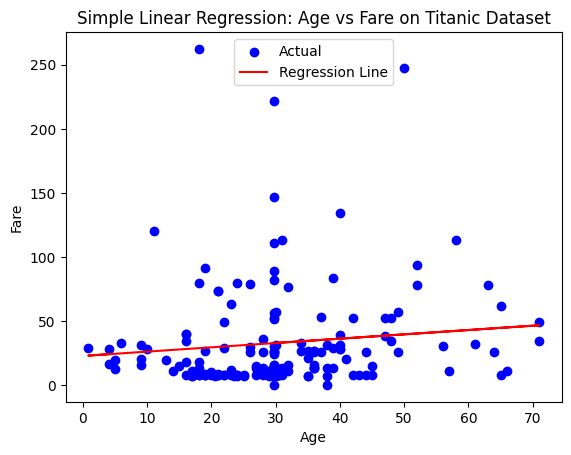

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the Titanic dataset (assuming it's already loaded in a previous cell as 'data')
# If 'data' is not available, uncomment the line below and update the path:
# try:
#     data = pd.read_csv('/content/Titanic-Dataset.csv', encoding="latin1")
# except FileNotFoundError:
#     print("Error: Titanic-Dataset.csv not found. Please upload the dataset or update the file path.")
#     raise

# Select the features and target for simple linear regression
# Predicting 'Fare' using 'Age' as an example
X = data[['Age']]  # Feature (Age) - needs to be a DataFrame
y = data['Fare']   # Target (Fare) - can be a Series

# Handle missing values in 'Age' and 'Fare' before splitting
# Using SimpleImputer with mean strategy
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y for imputer


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Visualize the results (using test data)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Simple Linear Regression: Age vs Fare on Titanic Dataset')
plt.legend()
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np # Import numpy for mean calculation

# Assuming data_preprocessed_X from cell dvzWcjxBvJ1B and original 'data' DataFrame are available
# data_preprocessed_X contains the preprocessed features (X) of the Titanic dataset

# Check if the necessary variables exist
if 'data_preprocessed_X' in locals() and 'data' in locals():
    X = data_preprocessed_X
    # Get the 'Survived' column from the original data as the target variable
    if 'Survived' in data.columns:
        y = data['Survived'].values # Get the target column values as numpy array
    else:
        print("Error: 'Survived' column not found in the original dataset.")
        # Handle case where Survived column is missing
        y = None # Set y to None to prevent further execution


    if y is not None:
        # Initialize the classifiers
        clf1 = DecisionTreeClassifier(random_state=42)
        clf2 = LogisticRegression(max_iter=1000, solver='liblinear') # Added solver for potential warnings

        # Set up K-Fold cross-validation
        k_folds = KFold(n_splits=10, shuffle=True, random_state=42) # Added shuffle for better CV

        # Perform cross-validation for Decision Tree
        scores1 = cross_val_score(clf1, X, y, cv=k_folds)

        # Perform cross-validation for Logistic Regression
        scores2 = cross_val_score(clf2, X, y, cv=k_folds)

        print("Cross Validation Scores (Decision Tree): ", scores1)
        print("Average CV Score (Decision Tree): ", scores1.mean())
        print("Number of CV Scores used in Average: ", len(scores1))

        print("\nCross Validation Scores (Logistic Regression): ", scores2)
        print("Average CV Score (Logistic Regression): ", scores2.mean())
        print("Number of CV Scores used in Average: ", len(scores2))

else:
    print("Error: Preprocessed Titanic data (data_preprocessed_X) or original data not found.")
    print("Please run the data preprocessing cell (dvzWcjxBvJ1B) first.")

Cross Validation Scores (Decision Tree):  [0.76666667 0.80898876 0.76404494 0.70786517 0.79775281 0.7752809
 0.75280899 0.83146067 0.76404494 0.79775281]
Average CV Score (Decision Tree):  0.7766666666666666
Number of CV Scores used in Average:  10

Cross Validation Scores (Logistic Regression):  [0.84444444 0.76404494 0.82022472 0.76404494 0.80898876 0.87640449
 0.78651685 0.74157303 0.74157303 0.87640449]
Average CV Score (Logistic Regression):  0.8024219725343322
Number of CV Scores used in Average:  10


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Keep import in case needed later
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # Changed from LinearRegression for binary classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Added classification metrics

# Assuming X_train, X_test, y_train, y_test from cell dvzWcjxBvJ1B (Titanic preprocessing) are available
# IMPORTANT: Ensure you have run cell dvzWcjxBvJ1B just before this cell to have the correct Titanic data split.

# Check if the necessary variables exist from the Titanic preprocessing
if 'X_train' in locals() and 'X_test' in locals() and 'y_train' in locals() and 'y_test' in locals():
    # Use the preprocessed and split Titanic data
    x_train = X_train
    x_test = X_test
    y_train = y_train
    y_test = y_test

    # Train the Decision Tree Classifier on Titanic data
    dt = DecisionTreeClassifier(criterion="entropy", random_state=42) # Added random_state for reproducibility
    dt.fit(x_train, y_train)
    y_dt_pred = dt.predict(x_test)

    # Evaluate Decision Tree performance using classification metrics
    accuracy_dt = accuracy_score(y_test, y_dt_pred)
    precision_dt = precision_score(y_test, y_dt_pred)
    recall_dt = recall_score(y_test, y_dt_pred)
    f1_dt = f1_score(y_test, y_dt_pred)
    conf_matrix_dt = confusion_matrix(y_test, y_dt_pred)

    print("Decision Tree Classifier Performance on Titanic Data:")
    print("Accuracy:", accuracy_dt)
    print("Precision:", precision_dt)
    print("Recall:", recall_dt)
    print("F1-score:", f1_dt)
    print("Confusion Matrix:\n", conf_matrix_dt)


    # Train the Logistic Regression model on Titanic data
    # Logistic Regression is appropriate for the binary 'Survived' target
    lrr = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42) # Changed to LogisticRegression
    lrr.fit(x_train, y_train)
    y_lrr_pred = lrr.predict(x_test)

    # Evaluate Logistic Regression performance using classification metrics
    accuracy_lrr = accuracy_score(y_test, y_lrr_pred)
    precision_lrr = precision_score(y_test, y_lrr_pred)
    recall_lrr = recall_score(y_test, y_lrr_pred)
    f1_lrr = f1_score(y_test, y_lrr_pred)
    conf_matrix_lrr = confusion_matrix(y_test, y_lrr_pred)

    print("\nLogistic Regression Model Performance on Titanic Data:")
    print("Accuracy:", accuracy_lrr)
    print("Precision:", precision_lrr)
    print("Recall:", recall_lrr)
    print("F1-score:", f1_lrr)
    print("Confusion Matrix:\n", conf_matrix_lrr)

else:
    print("Error: Titanic data (X_train, X_test, y_train, y_test) not found.")
    print("Please run the data preprocessing and splitting cell (dvzWcjxBvJ1B) first.")

# Removed code related to loading Employee_Details.csv, Label Encoding for salary,
# selecting specific features by hardcoding column names, and Linear Regression metrics (including R2)
# as they are not relevant to Titanic classification

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.